In [111]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
data = pd.read_csv(uri)
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [112]:
#Tratando os dados para melhorar a análise
swap = {
    0:1,
    1:0
}

data['finished'] = data.unfinished.map(swap)
data.drop(columns="unfinished", inplace = True)
data

,expected_hours,price,finished
0,26,192,0
1,88,9015,0
2,89,2577,0
3,42,275,0
4,39,170,0
...,...,...,...
2152,80,7518,1
2153,52,1332,0
2154,40,473,1
2155,75,5324,1


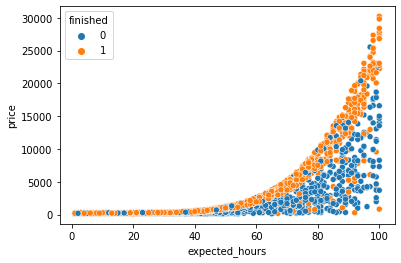

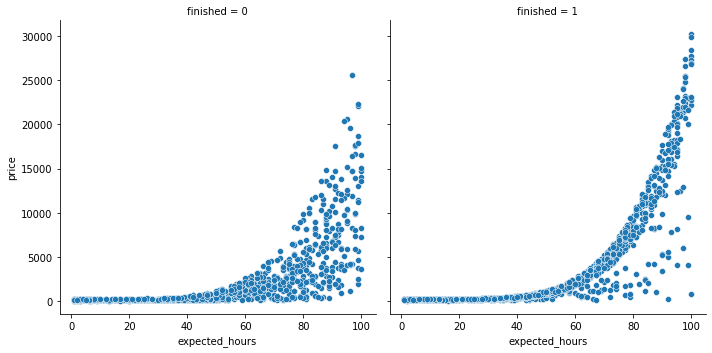

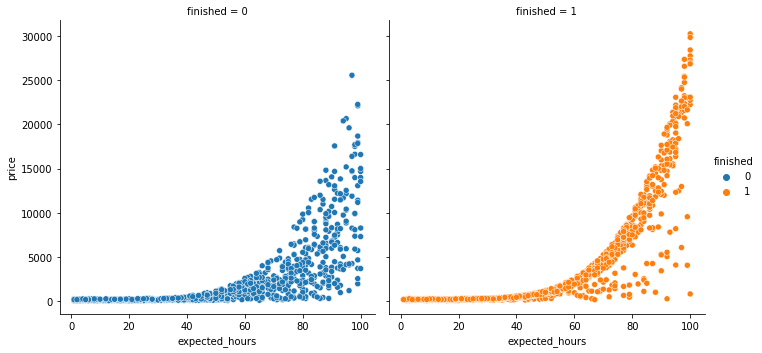

In [113]:
#Plotando gráficos para melhor visualização e ter uma melhor noção intuitiva
import seaborn as sns

sns.scatterplot(
    x="expected_hours", 
    y="price", 
    hue="finished", 
    data=data
)

sns.relplot(
    x="expected_hours", 
    y="price", 
    col="finished", 
    data=data
)


sns.relplot(
    x = "expected_hours",
    y = "price",
    hue = "finished",
    col = "finished",
    data = data
)

Melhor o pagamento --> Maiores as chances do projeto ser finalizado

In [114]:
#Separando as colunas de input e output
x = data[["expected_hours","price"]]
y = data["finished"]

In [115]:
#Separando os treino dos testes
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(
    x,
    y,
    test_size = 0.25,
    stratify = y
)

In [116]:
#Verificando as proporções
print(train_y.value_counts()[0]/train_y.value_counts()[1])
print(test_y.value_counts()[0]/test_y.value_counts()[1])

0.9023529411764706
0.9014084507042254


In [117]:
#Treinando o modelo
from sklearn.svm import LinearSVC

model = LinearSVC()

model.fit(train_x, train_y)

/home/adame/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [118]:
#Predicts do modelo
from sklearn.metrics import accuracy_score
predict = model.predict(test_x)
print(predict)

accuracy = accuracy_score(predict, test_y)
accuracy

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

0.4925925925925926

Desse modo o modelo está horrível...

In [119]:
#Criando uma baseline:

#Baseline é uma previsão mas formada apenas de um valor "jogar uma moeda", 50% de chance

import numpy as np

baseline = np.ones(len(test_x)) #array apenas com valores '1'

In [120]:
#Accuracy do modelo com uma baseline
baseline_accuracy = accuracy_score(test_y, baseline)
baseline_accuracy

0.5259259259259259

Devemos ser muito melhor que uma BASE LINE

    Previsão do algoritmo tem q ser muito melhor doque apenas um chute

Criando um visualização...
    
    funciona apenas em duas dimensões

In [121]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()


pixel = 500
x_min, x_max, (x_max - x_min) / pixel

axis_x = np.arange(x_min, x_max, (x_max - x_min) / pixel)
axis_y = np.arange(y_min, y_max, (y_max - y_min) / pixel)

xx, yy = np.meshgrid(axis_x, axis_y)
dots = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(dots).reshape(xx.shape) 

/home/adame/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


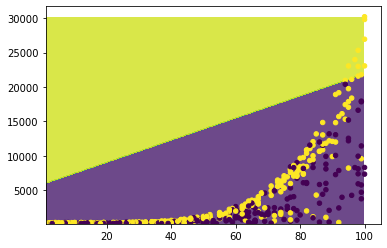

In [122]:
#Indo baixo nivel para plotar
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.8)
plt.scatter(test_x.expected_hours, test_x.price, c = test_y, s = 20)

Decision Boundary está horrível

    É necessário um algoritmo mais complexo para aprender relacionamentos não lineares